In [23]:
import json # importing json library
import glob # importing glob library
import os # importing OS library
import csv # importing csv
import logging # import logging
import matplotlib.pyplot as plt
import operator # importing operator
import numpy as np

In [24]:
def getLogger(dir):
    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger()
    # create a file handler
    handler = logging.FileHandler(fileDir+'/ques2part2.log')
    handler.setLevel(logging.INFO)
    # create a logging format
    formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    handler.setFormatter(formatter)
    # add the handlers to the logger
    logger.addHandler(handler)
    return logger

In [25]:
fileDir = os.path.dirname(os.path.realpath('__file__'))
logger = getLogger(fileDir)
logger.info("Application started....")
logger.info("Reading JSON files from data folder.")
filenames = sorted(glob.glob(fileDir+'/data/*.json')) # reading all the filenames in the data folder
logger.info(str(len(filenames)) + " number of JSON files found in data folder")

INFO:root:Application started....
INFO:root:Reading JSON files from data folder.
INFO:root:1422 number of JSON files found in data folder


In [26]:
articles = []
logger.info("Iterating through all the JSON files.")
for file in filenames:  # iterating through all the files
    #file = 'D:/NEU/Spring2017/Python/midterm/data/20170201.0.json'
    with open(file) as data_file:    
        content = json.load(data_file) # load JSON
        articles.extend(content['response']['docs'])
logger.info(str(len(articles)) + " number of articles files found.")

INFO:root:Iterating through all the JSON files.
INFO:root:14154 number of articles files found.


In [27]:
types_of_material = []
for article in articles:
    types_of_material.append(article.get('type_of_material'))
from collections import Counter  # importing counter
wordFreqDict = dict(Counter(types_of_material))  # converting collection to dictionary
sortedDict = sorted(wordFreqDict.items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by value

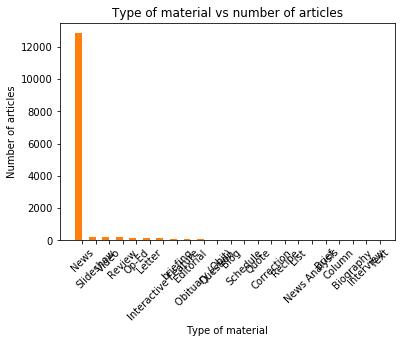

In [28]:
N = len(sortedDict)
x = np.arange(1, N+1)
y = [val for key, val in sortedDict]
labels = [key for key, val in sortedDict]
width = 0.5
plt.bar(x, y, width)
plt.ylabel('Number of articles')
plt.xlabel('Type of material')
plt.title('Type of material vs number of articles')
plt.xticks(x + width/2.0, labels)
plt.xticks(rotation=45)
plt.show()

In [29]:
news = [article for article in articles if article.get('type_of_material') == 'News']
keywords = []
for ne in news :
    keywords.extend(ne.get('keywords'))
topics = [(keyword.get('name'), keyword.get('value')) for keyword in keywords]
topicsDict = dict(Counter(topics))
sortedDict = sorted(topicsDict.items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by value
names = set([keyword.get('name') for keyword in keywords])

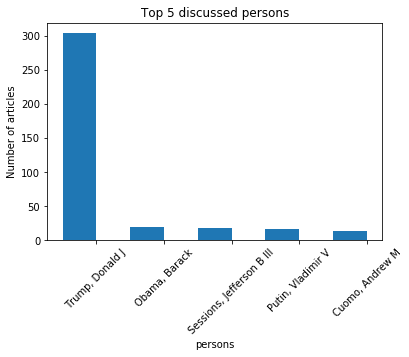

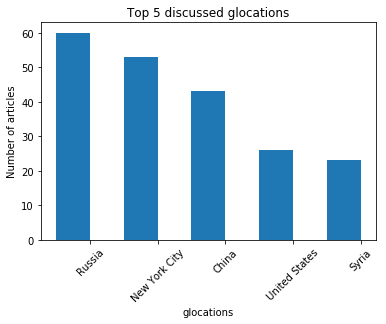

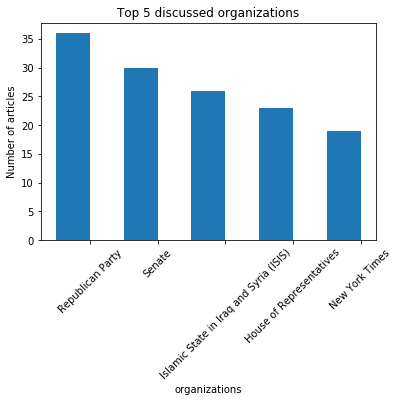

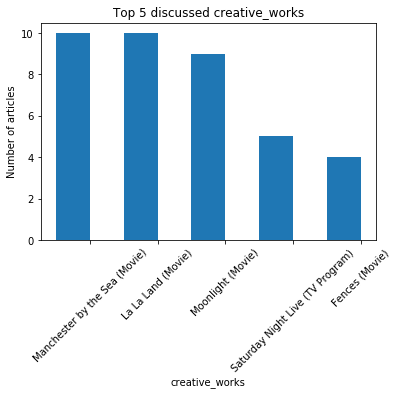

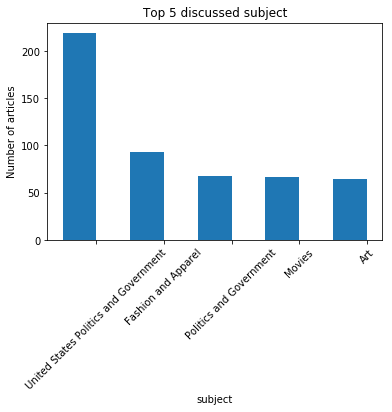

In [32]:
for name in names:
    y = [count for (key, val), count in sortedDict if key == name][:5]
    labels = [val for (key, val), count in sortedDict if key == name][:5]
    N = len(y)
    x = np.arange(1, N+1)
    width = 0.5
    plt.bar(x, y, width)
    plt.ylabel('Number of articles')
    plt.xlabel(name)
    plt.title('Top 5 discussed '+name)
    plt.xticks(x + width/2.0, labels)
    plt.xticks(rotation=45)
    plt.show()